# **Nicholas Salim**
# **CAKAP Data Scientist B**

# LOAD DATASET

In [275]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# After uploading, you can load the file
file_name = list(uploaded.keys())[0]  # Get the file name from the uploaded dictionary
df = pd.read_csv(file_name)

display(df)


Saving garments_worker_productivity.csv to garments_worker_productivity (15).csv


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# STRUCTURE & DIMENSION

In [276]:
print("Dimensi Dataframe", df.shape)
print("")
print("Columns:", df.columns)
print("")
print("Data Types:\n", df.dtypes)
print("")
display(df.describe())



Dimensi Dataframe (1197, 15)

Columns: Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

Data Types:
 date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object



,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Check Duplicate Rows

In [277]:
import pandas as pd

# Check if any row is exactly identical to another
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print("Row duplikat:")
    print(duplicates)
else:
    print("Tidak ada row duplikat.")

Tidak ada row duplikat.


Typo Correction

In [278]:
# Koreksi typo (Typo Correction)
typos_correction = {
    'fneishing': 'finishing',  # Example typo correction
    'sweing': 'sewing',
    # Add more typo corrections as needed
}

# Identify categorical columns (modify this list based on your dataset)
categorical_columns = ['quarter', 'department', 'day']  # Replace with actual column names

# **Step 1: Typo Correction**
# Apply corrections for typos in the categorical columns
for col in categorical_columns:
    # Remove leading/trailing spaces and apply typo corrections
    df[col] = df[col].str.strip().replace(typos_correction)

    # Optionally print the unique values after typo correction
    print(f"After typo correction for column '{col}':")
    print(df[col].value_counts())
    print("\n")

# The original DataFrame (df) has been updated with corrected values.


After typo correction for column 'quarter':
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


After typo correction for column 'department':
department
sewing       691
finishing    506
Name: count, dtype: int64


After typo correction for column 'day':
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64




Check Missing Values

In [279]:
import pandas as pd

# Calculate the number of missing values and total number of values per column
missing_values = df.isnull().sum()

# Calculate the fraction of missing values per column
missing_fraction = missing_values / len(df)

# Display the missing values fraction and percentage for each column
print("Missing values pada setiap kolom:")
for column, fraction in missing_fraction.items():
    if missing_values[column] > 0:  # Only print if there are missing values
        print(f"{column}: {missing_values[column]}/{len(df)} ({fraction:.2%})")
    else:
        print(f"{column}: 0")  # Print 0 if there are no missing values


Missing values pada setiap kolom:
date: 0
quarter: 0
department: 0
day: 0
team: 0
targeted_productivity: 0
smv: 0
wip: 506/1197 (42.27%)
over_time: 0
incentive: 0
idle_time: 0
idle_men: 0
no_of_style_change: 0
no_of_workers: 0
actual_productivity: 0


Check Outliers (Boxplot)

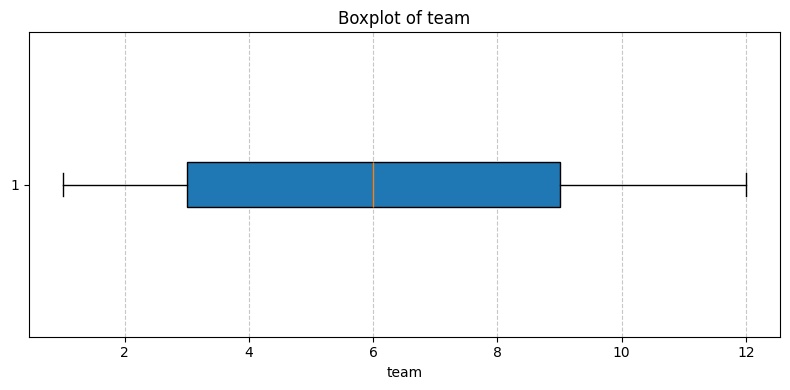

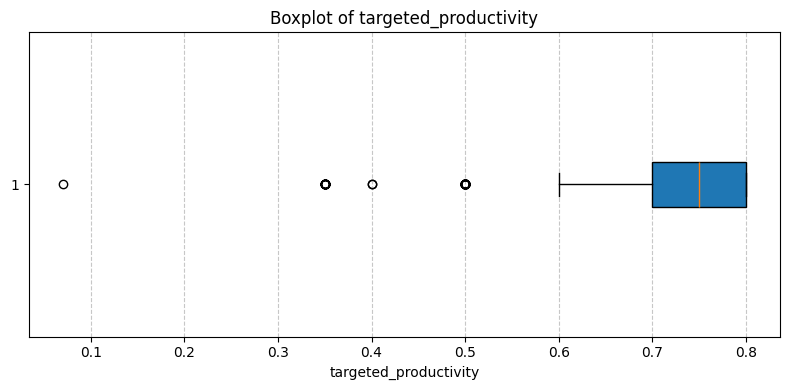

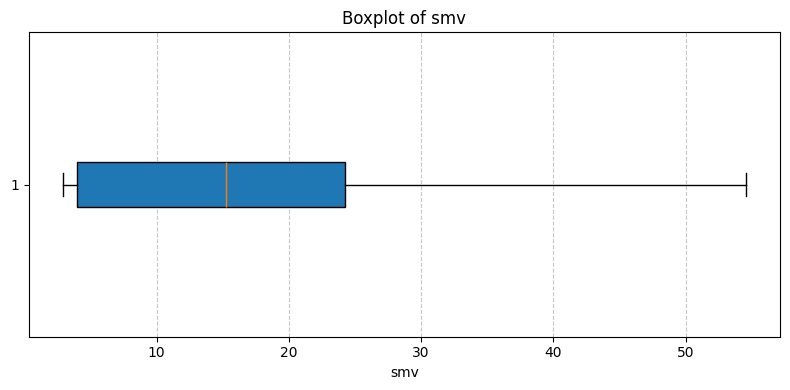

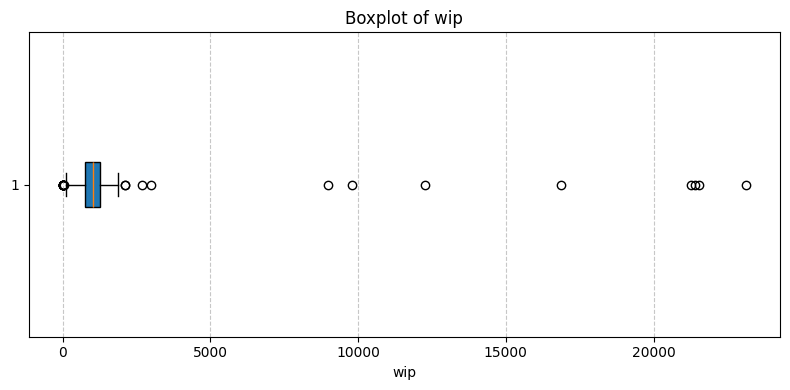

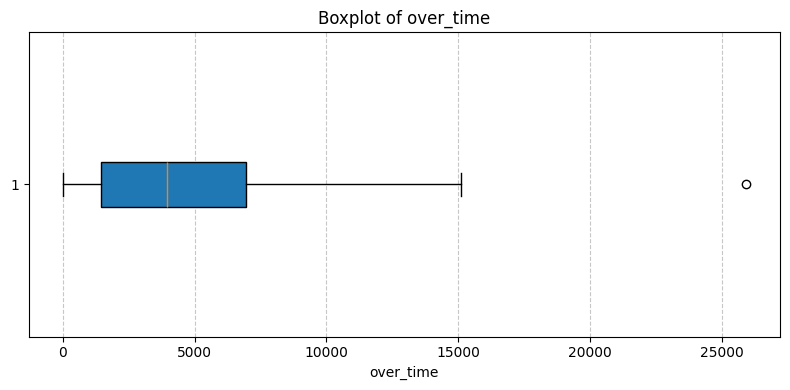

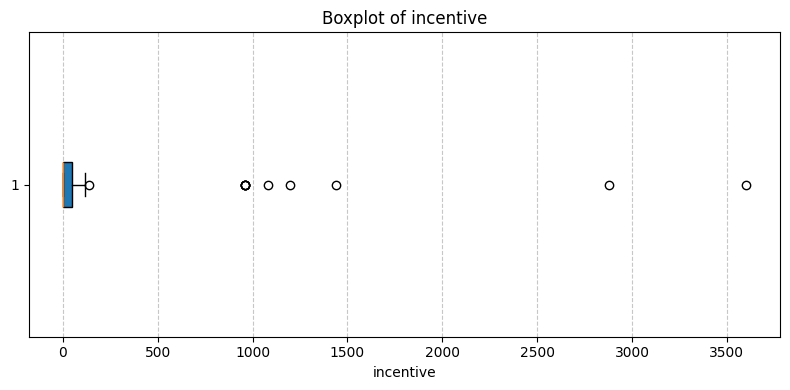

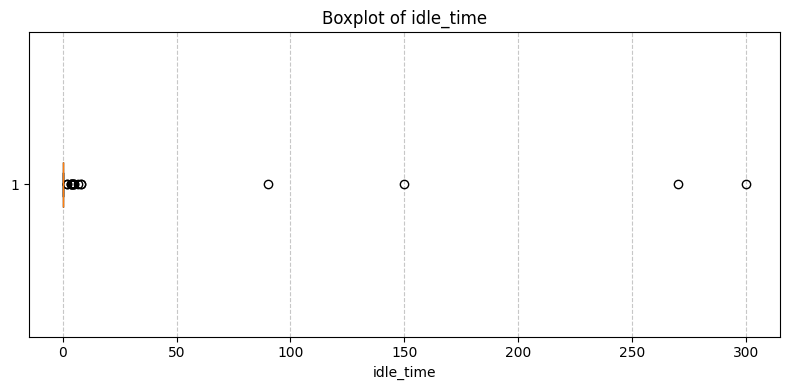

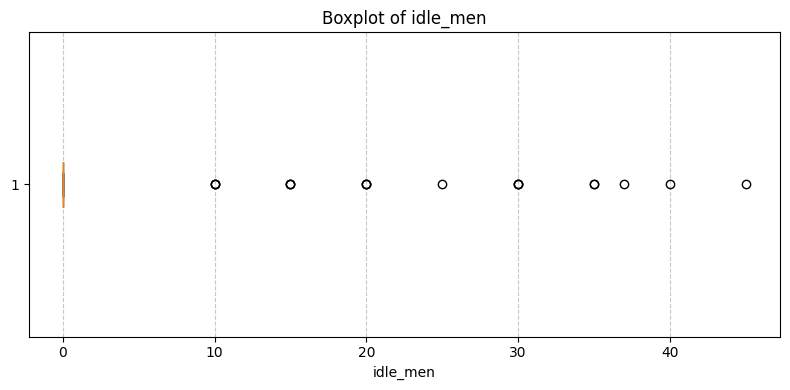

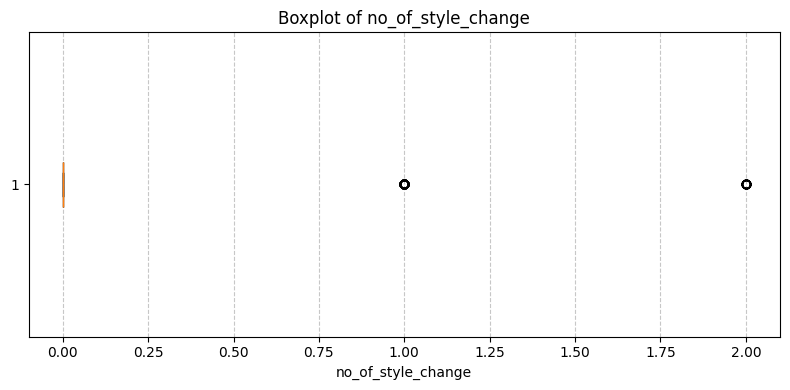

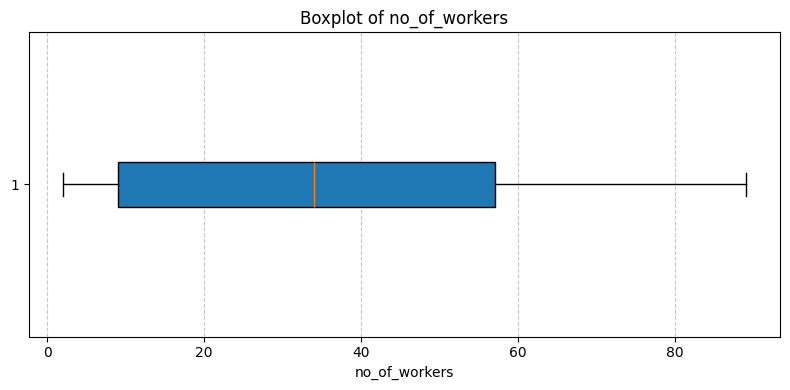

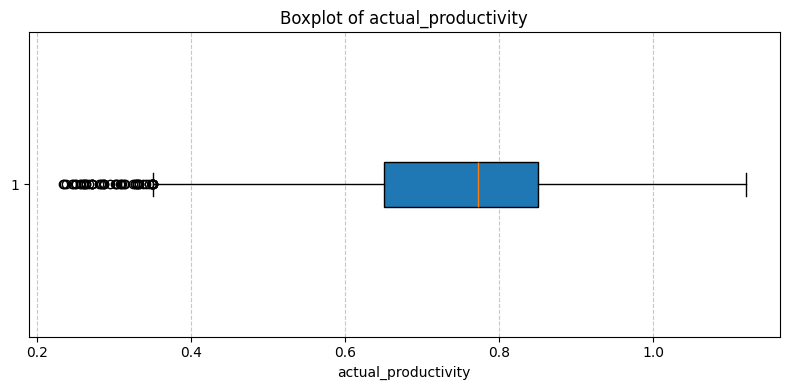

In [280]:
import pandas as pd
import matplotlib.pyplot as plt



# Create boxplots for all columns
for column in df.select_dtypes(include=['number']).columns:  # Select only numeric columns
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Check Data Distribution (Shapiro-Wilk Test)

In [281]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on all numeric columns
results = {}
alpha = 0.05  # Significance level

for column in df.select_dtypes(include=['number']).columns:  # Select only numeric columns
    stat, p_value = shapiro(df[column].dropna())  # Perform Shapiro-Wilk test
    if p_value > alpha:
        results[column] = 'Normal'
    else:
        results[column] = 'Not Normal'

# Display results
print("Shapiro-Wilk Test Results:")
for column, result in results.items():
    print(f"{column}: {result}")


Shapiro-Wilk Test Results:
team: Not Normal
targeted_productivity: Not Normal
smv: Not Normal
wip: Not Normal
over_time: Not Normal
incentive: Not Normal
idle_time: Not Normal
idle_men: Not Normal
no_of_style_change: Not Normal
no_of_workers: Not Normal
actual_productivity: Not Normal


Check Data Distribution (Kolmogorov-Smirnov Test)

In [282]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test on all numeric columns
results = {}
alpha = 0.05  # Significance level

for column in df.select_dtypes(include=['number']).columns:  # Select only numeric columns
    # Perform K-S test against a normal distribution
    stat, p_value = kstest(df[column].dropna(), 'norm',
                           args=(df[column].mean(), df[column].std()))
    if p_value > alpha:
        results[column] = 'Normal'
    else:
        results[column] = 'Not Normal'

# Display results
print("Kolmogorov-Smirnov Test Results:")
for column, result in results.items():
    print(f"{column}: {result}")


Kolmogorov-Smirnov Test Results:
team: Not Normal
targeted_productivity: Not Normal
smv: Not Normal
wip: Not Normal
over_time: Not Normal
incentive: Not Normal
idle_time: Not Normal
idle_men: Not Normal
no_of_style_change: Not Normal
no_of_workers: Not Normal
actual_productivity: Not Normal


In [283]:
# Print the values in 'wip' and 'targeted_productivity' for row 1192
display(df.iloc[1192, [df.columns.get_loc('wip'), df.columns.get_loc('targeted_productivity')]])


,1192
wip,NaN
targeted_productivity,0.75


Imputation with Median pada missing value kolom wip (median robust ke outlier dan skewed data)

In [284]:
# Karena data tidak berdistribusi normal dan memiliki outlier, gunakan median untuk imputasi(karena robust terhadap outlier)
# Karena data memiliki banyak outlier, lebih baik TIDAK memakai mean untuk imputasi

# Calculate the median
median_wip = df['wip'].median()

# Impute missing values and assign back to the column
df['wip'] = df['wip'].fillna(median_wip)

# Verify that missing values have been filled
print(f"Missing values in 'wip' after imputation: {df['wip'].isnull().sum()}")

display(df)

Missing values in 'wip' after imputation: 0


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [285]:
# Print the values in 'wip' and 'targeted_productivity' for row 1192
display(df.iloc[1192, [df.columns.get_loc('wip'), df.columns.get_loc('targeted_productivity')]])


,1192
wip,1039.0
targeted_productivity,0.75


# Imbalance Case for Continuous Data

Check Skewness

-0.5 to +0.5 (Not skewed)

-1 to -0.5 or +0.5 to +1 (Moderately skewed)

Less than -1 or greater than +1 (Highly skewed)

In [286]:
skewness = df['actual_productivity'].skew()
print(f"Skewness: {skewness:.3f}")

# Skewness -0.807 berarrti data negative skewed

Skewness: -0.807


Negative (Left tail)

<Axes: xlabel='actual_productivity', ylabel='Count'>

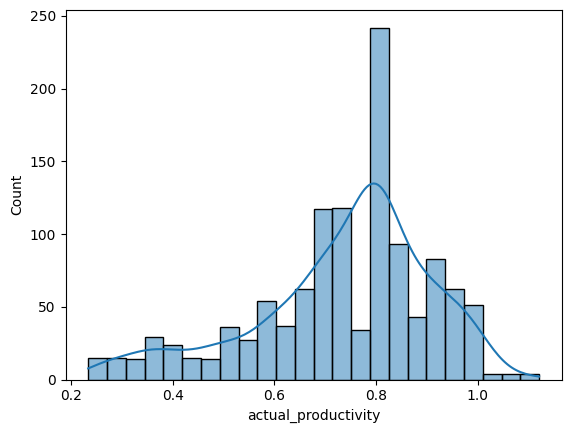

In [287]:
import seaborn as sns
sns.histplot(df['actual_productivity'], kde=True)
# Dengan tail memanjang ke kiri

Mean < Median < Mode: Negative skew (left-skewed)

Mode < Median < Mean: Positive skew (right-skewed)

In [288]:
mean_val = df['actual_productivity'].mean()
median_val = df['actual_productivity'].median()
mode_val = df['actual_productivity'].mode()[0]

print(f"Mean: {mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Mode: {mode_val:.3f}")

if mean_val > median_val:
    print("Data is right-skewed.")
elif mean_val < median_val:
    print("Data is left-skewed. (negative)")
else:
    print("Data is approximately symmetric.")

# Mean < Median < Mode: Negative skew (left-skewed)
# Mode < Median < Mean: Positive skew (right-skewed)

Mean: 0.735
Median: 0.773
Mode: 0.800
Data is left-skewed. (negative)


# EDA

Drop date (feature not significant)

In [289]:
# Drop date (not used)
df = df.drop(columns=['date'])


Correlation of Features (Predictors) with Target Variable

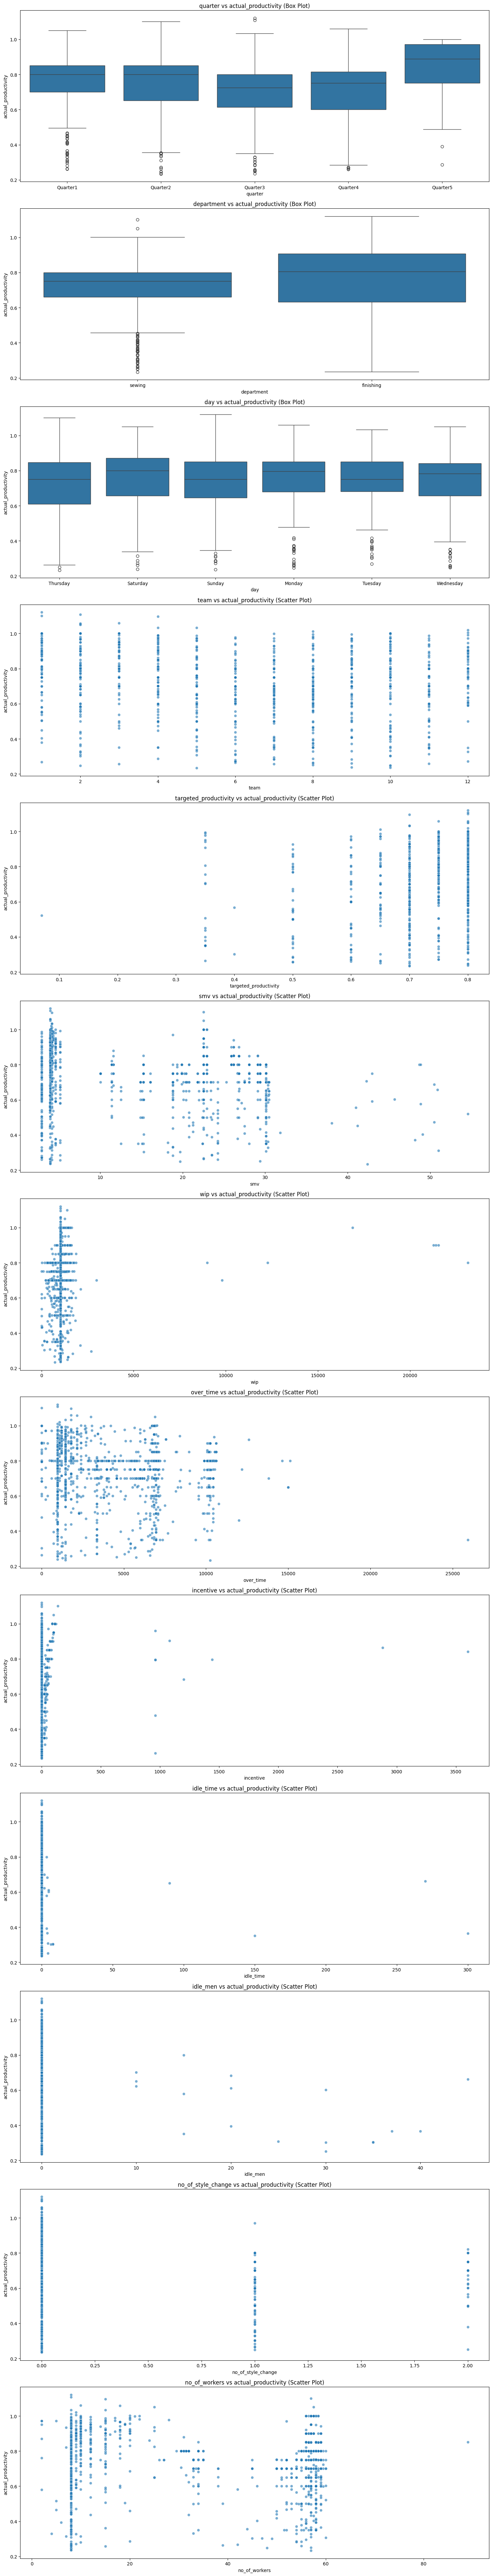

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataframe `df`
# Set the target column
target = 'actual_productivity'

# List of features to compare with the target
features = [col for col in df.columns if col != target]

# Plot settings
plt.figure(figsize=(15, 6 * len(features)))

# Generate plots for each feature
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)

    # Check data type and plot accordingly
    if df[feature].dtype in ['float64', 'int64']:  # Numerical column
        sns.scatterplot(x=df[feature], y=df[target], alpha=0.6)  # Scatter plot without regression line
        plt.title(f'{feature} vs {target} (Scatter Plot)')
    else:  # Categorical column
        sns.boxplot(x=df[feature], y=df[target])
        plt.title(f'{feature} vs {target} (Box Plot)')

    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


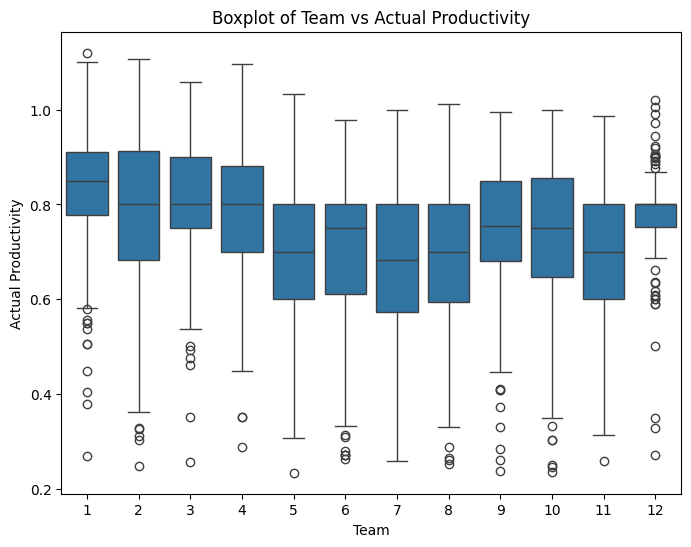

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical 'team' column vs target 'actual_productivity'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['team'], y=df['actual_productivity'])
plt.title('Boxplot of Team vs Actual Productivity')
plt.xlabel('Team')
plt.ylabel('Actual Productivity')

plt.show()


Feature Encoding

Solve linearity by mapping categorical value

In [292]:
display(df.head())

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Feature encoding (Label encoder)

Mapping (change to numerical for corelation check and modeling)

In [293]:
from sklearn.preprocessing import LabelEncoder

# Mapping custom untuk hari (Custom mapping for 'day' column)
day_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Saturday': 4,
    'Sunday': 5
}

# Initialize LabelEncoder
label_encoders = {}

# **Step 2: Mapping and Label Encoding**
# Apply mapping for 'day' column and label encoding for other columns
for col in categorical_columns:
    if col == 'day':  # Apply custom encoding for 'day' column
        df[col] = df[col].map(day_order)  # Map the 'day' column to the custom order
    else:  # For other columns, apply standard label encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store the encoder for later decoding

    # Display the mapping of original categories to encoded labels
    print(f"Mapping untuk kolom '{col}':")
    if col == 'day':
        print(day_order)  # Custom order for 'day' column
    else:
        le = label_encoders.get(col, None)
        if le:
            print(dict(zip(le.classes_, le.transform(le.classes_))))
    print("\n")

# The original DataFrame (df) has been updated with encoded values.
display(df)


Mapping untuk kolom 'quarter':
{'Quarter1': 0, 'Quarter2': 1, 'Quarter3': 2, 'Quarter4': 3, 'Quarter5': 4}


Mapping untuk kolom 'department':
{'finishing': 0, 'sewing': 1}


Mapping untuk kolom 'day':
{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Saturday': 4, 'Sunday': 5}




,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,2,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,2,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,2,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,2,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


Correlation Matrix

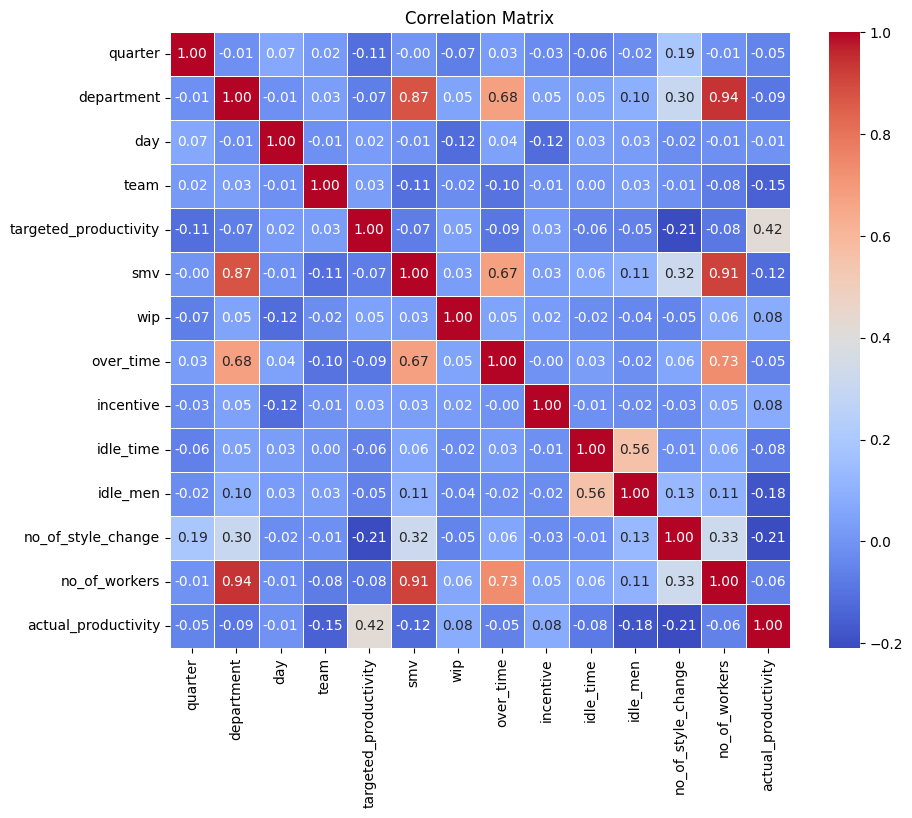

In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Mutual Information

In [295]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Step 1: Data preparation (Assuming 'df' is your DataFrame)

X = df[['targeted_productivity', 'smv','wip', 'incentive', 'over_time', 'no_of_workers', 'idle_men','day','quarter','idle_time','department','team','no_of_style_change']]
y = df['actual_productivity']

# Step 2: Compute Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)

# Step 3: Create a DataFrame to visualize scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("Mutual Information Scores:")
print(mi_df)

# Optional: Select important features (if thresholding is needed)
selected_features = mi_df[mi_df['MI Score'] > 0.1]['Feature']  # Adjust threshold as needed
print("\nSelected Features based on Mutual Information:")
print(selected_features.tolist())


Mutual Information Scores:
                  Feature  MI Score
3               incentive  1.139640
1                     smv  0.981881
5           no_of_workers  0.845531
4               over_time  0.807481
0   targeted_productivity  0.508854
2                     wip  0.425481
10             department  0.424730
11                   team  0.312619
8                 quarter  0.134936
12     no_of_style_change  0.103785
6                idle_men  0.016661
9               idle_time  0.016460
7                     day  0.000000

Selected Features based on Mutual Information:
['incentive', 'smv', 'no_of_workers', 'over_time', 'targeted_productivity', 'wip', 'department', 'team', 'quarter', 'no_of_style_change']


Correlation of all features to target variable (actual_productivity)

In [296]:
import pandas as pd

# Assuming 'df' is your DataFrame
# List of columns to exclude from the correlation (logged or powered versions)
exclude_columns = []

# Calculate the correlation with 'actual_productivity' and sort
correlation_with_target = df.drop(columns=exclude_columns).corr()['actual_productivity'].sort_values(ascending=False)

# Display the correlation values with 'actual_productivity'
print("Correlation with 'actual_productivity' :")
print(correlation_with_target)

Correlation with 'actual_productivity' :
actual_productivity      1.000000
targeted_productivity    0.421594
wip                      0.083545
incentive                0.076538
day                     -0.005104
quarter                 -0.051970
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
department              -0.087624
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


Multicolinearity check (VIF)

In [297]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'df' is your DataFrame and 'actual_productivity' is the target variable
X = df.drop(columns=['actual_productivity'])


# Handle NaNs and Infinite values:
X = X.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
X = X.fillna(X.median())  # Replace NaNs with the median value


# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                  Feature        VIF
0                 quarter   2.406868
1              department  22.002599
2                     day   3.181214
3                    team   4.720250
4   targeted_productivity  11.561054
5                     smv  18.070393
6                     wip   1.693555
7               over_time   7.046838
8               incentive   1.082872
9               idle_time   1.484773
10               idle_men   1.548596
11     no_of_style_change   1.500771
12          no_of_workers  48.676067


Berdasarkan korelasi predictor ke target:

day (korelasi rendah)




Berdasarkan mutual information:

team, quarter, no_of_style_change, idle_men, idle_time, day (predictive value yang rendah)



Berdasarkan multicolinearity test dan matrix:

department, no_of_worker (high colinearity dengan smv)


Outliers

In [298]:
import pandas as pd

# Assuming 'df' is your DataFrame
outlier_summary = {}  # Dictionary to store outlier counts per column

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Calculate the number and percentage of outliers
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    # Store the results in the dictionary
    outlier_summary[column] = {
        'Outlier Count': outlier_count,
        'Outlier Percentage': round(outlier_percentage, 2)
    }

# Convert summary to DataFrame for better visualization
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index')
print(outlier_df.sort_values(by='Outlier Count', ascending=False))


                       Outlier Count  Outlier Percentage
wip                              358               29.91
no_of_style_change               147               12.28
targeted_productivity             79                6.60
actual_productivity               54                4.51
idle_time                         18                1.50
idle_men                          18                1.50
incentive                         11                0.92
over_time                          1                0.08
quarter                            0                0.00
department                         0                0.00
day                                0                0.00
team                               0                0.00
smv                                0                0.00
no_of_workers                      0                0.00


Replace outliers with median

In [299]:
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Columns to check for outliers
columns_to_check = ['wip', 'incentive', 'no_of_style_change', 'idle_men', 'idle_time', 'targeted_productivity', 'over_time']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define outlier detection thresholds based on IQR for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column (this will give a boolean mask for each column)
outlier_conditions = [(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]) for col in columns_to_check]

# Print initial row count
print(f"Initial row count: {df.shape[0]}")

# Replace outliers with the median value of each column, modifying the original df
for col in columns_to_check:
    # Get the median of the column
    median_value = df[col].median()
    # Replace outliers with the median value directly in df
    df[col] = np.where(outlier_conditions[columns_to_check.index(col)], median_value, df[col])

# Print the number of outliers replaced for each feature
outlier_count = {col: ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum() for col in columns_to_check}
outlier_count_series = pd.Series(outlier_count)
print("Outliers after replaced with median:")
print(outlier_count_series)

# Check if the number of rows is unchanged
print(f"Row count after replacing outliers: {df.shape[0]}")

# Display the modified DataFrame (outliers replaced with median)
print("\nDataFrame with Outliers replaced with Median:")
print(df.head())



Initial row count: 1197
Outliers after replaced with median:
wip                      0
incentive                0
no_of_style_change       0
idle_men                 0
idle_time                0
targeted_productivity    0
over_time                0
dtype: int64
Row count after replacing outliers: 1197

DataFrame with Outliers replaced with Median:
   quarter  department  day  team  targeted_productivity    smv     wip  \
0        0           1    3     8                   0.80  26.16  1108.0   
1        0           0    3     1                   0.75   3.94  1039.0   
2        0           1    3    11                   0.80  11.41   968.0   
3        0           1    3    12                   0.80  11.41   968.0   
4        0           1    3     6                   0.80  25.90  1170.0   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0     7080.0       98.0        0.0       0.0                 0.0   
1      960.0        0.0        0.0       0.0                 0

Import data untuk modeling

In [300]:

# Save the cleaned DataFrame to CSV for download (optional)
output_file = '/content/garments_model.csv'  # Path to save the file
df.to_csv(output_file, index=False)

# Provide the download link for the file (Google Colab specific)
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>